<a href="https://colab.research.google.com/github/knoppin1/DATA-690-WANG/blob/master/Individual_Project/COVID_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Sand Box

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [148]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv

--2020-11-06 20:37:37--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3372318 (3.2M) [text/plain]
Saving to: ‘time_series_covid19_confirmed_US.csv.4’

time_series_covid19 100%[===================>]   3.22M  16.0MB/s    in 0.2s    

2020-11-06 20:37:38 (16.0 MB/s) - ‘time_series_covid19_confirmed_US.csv.4’ saved [3372318/3372318]



Read the saved CSV file into a pandas dataframe.

In [149]:
time_series_covid_df = pd.read_csv("time_series_covid19_confirmed_US.csv")
time_series_covid_df.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1773,1785,1787,1791,1798,1805,1818,1828,1831,1839,1852,1863,1882,1898,1905,1911,1924,1928,1949,1966,1983,1989,1999,2010,2021,2023,2030,2048,2059,2074,2082,2103,2126,2141,2159,2173,2186,2197,2212,2230
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5526,5588,5606,5640,5997,6024,6048,6073,6085,6116,6134,6141,6172,6190,6203,6220,6248,6270,6285,6333,6350,6369,6375,6405,6443,6475,6615,6637,6658,6694,6712,6743,6768,6888,6940,6966,6985,6995,7061,7097
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,885,886,886,896,898,902,921,921,921,923,927,927,939,942,942,944,951,950,965,968,977,981,981,988,996,997,1012,1031,1033,1033,1042,1045,1055,1056,1060,1061,1065,1074,1079,1080
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,656,657,658,664,672,675,678,686,687,691,703,708,719,726,736,738,744,744,761,771,775,785,789,791,801,811,825,828,840,843,850,856,861,866,873,878,883,890,897,907
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1617,1618,1621,1629,1634,1642,1655,1656,1662,1665,1673,1681,1689,1704,1713,1722,1742,1750,1768,1783,1807,1827,1838,1848,1873,1893,1911,1925,1932,1942,1972,1988,2009,2039,2074,2095,2108,2162,2188,2222


In [150]:
time_series_covid_df.shape

(3340, 300)

Check for Missing Data
- FIPS code is the critical field to evaluate since it is used to join with other data sets in the study.

In [151]:
# Find records with missing FIPS code
time_series_covid_df[time_series_covid_df.FIPS.isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20
1267,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,"Dukes and Nantucket,Massachusetts,US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,157,167,169,168,179,185,190,191,191,191,192,194,197,198,200,201,201,201,202,202,204,204,204,208,208,209,213,218,218,229,230,241,244,253,258,262,262,266,272,283
1304,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,"Federal Correctional Institution (FCI), Michig...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197
1336,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,"Michigan Department of Corrections (MDOC), Mic...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5593,5599,5603,5611,5616,5622,5623,5623,5623,5627,5631,5637,5650,5650,5650,5693,5790,5796,5803,5832,5846,5846,6248,6267,6293,6329,6459,6510,6510,6538,6562,6691,6883,6958,6984,6984,7016,7061,7181,7457
1591,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,"Kansas City,Missouri,US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11147,11276,11276,11276,11276,12111,12253,12387,12418,12488,12536,12623,12743,13077,13077,13077,13077,12934,13101,13263,13499,13614,13733,13792,13869,13904,13989,14117,14229,14313,14435,14583,14583,14986,15245,15372,15593,15738,15892,16159
2954,84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3351,3372,3398,3425,3449,3510,3553,3613,3679,3721,3751,3859,3911,3974,4038,4109,4142,4188,4301,4363,4436,4509,4578,4624,4659,4754,4867,4956,5025,5101,5149,5197,5336,5438,5529,5614,5652,5721,5855,5960
2959,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,647,661,671,681,697,707,727,752,764,766,794,809,824,855,880,890,908,943,977,996,1038,1058,1072,1077,1122,1150,1176,1203,1227,1253,1261,1293,1318,1358,1388,1435,1440,1443,1500,1524
2978,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,214,216,221,223,229,233,235,243,250,256,257,268,277,285,289,292,308,320,337,349,357,359,362,373,385,408,422,439,452,453,466,488,512,532,548,566,575,606,626,643
2979,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4210,4234,4255,4304,4354,4408,4478,4521,4563,4597,4653,4682,4747,4822,4873,4925,4990,5023,5113,5160,5252,5325,5376,5423,5504,5571,5705,5792,5852,5971,6055,6153,6273,6380,6474,6568,6632,6741,6880,7019
2982,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,237,237,238,240,243,245,248,252,255,258,265,273,275,282,287,289,295,300,302,306,309,314,318,333,357,372,384,399,412,420,441,453,470,502,525,541,551,597,627,645
2990,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",0,0,0,0,0,0,0,0,0,

Remove records without a FIPS code

In [152]:
time_series_covid_df = time_series_covid_df[time_series_covid_df.FIPS.notna()]
time_series_covid_df.shape

(3330, 300)

In [153]:
# Find records with missing Admin2 column (i.e., County)
time_series_covid_df[time_series_covid_df.Admin2.isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20
100,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
336,84088888,US,USA,840,88888.0,NaN,Diamond Princess,US,0.0000,0.0000,"Diamond Princess, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
570,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0000,0.0000,"Grand Princess, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103
571,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2286,2286,2443,2488,2488,2488,2617,2617,2753,2818,2868,2934,2989,2989,2989,3170,3266,3341,3427,3538,3538,3538,3756,3886,3968,4056,4141,4141,4141,4336,4418,4466,4549,4628,4628,4628,4628,4812,4903,5004
2121,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,70,70,70,70,73,73,73,73,75,75,75,75,75,77,77,77,77,77,80,80,86,86,86,88,88,88,88,88,88,92,92,92,92,92,92,96,96,96,96,98
3007,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1317,1318,1318,1318,1326,1326,1327,1327,1322,1321,1322,1324,1324,1325,1325,1325,1328,1328,1329,1329,1335,1335,1335,1337,1337,1343,1346,1346,1346,1348,1351,1353,1353,1362,1376,1376,1376,1385,1388,1388


Remove records without a county

In [154]:
time_series_covid_df = time_series_covid_df[time_series_covid_df.Admin2.notna()]
time_series_covid_df.shape

(3324, 300)

Use `melt` to convert the dataframe from wide format to long format

In [155]:
long_time_series_covid_df = time_series_covid_df.melt(
    id_vars=time_series_covid_df.columns[:11],
    value_vars=time_series_covid_df.columns[11:],
    var_name="Date",
    value_name="Confirmed"
)
long_time_series_covid_df.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0


Review columns for unexpected data

In [156]:
long_time_series_covid_df.describe(include='all')

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
count,9.606360e+05,960636,960636,960636.000000,960636.000000,960636,960636,960636,960636.000000,960636.000000,960636,960636,960636.000000
unique,NaN,2,2,NaN,NaN,1968,52,1,NaN,NaN,3324,289,NaN
top,NaN,US,USA,NaN,NaN,Unassigned,Texas,US,NaN,NaN,"Beltrami, Minnesota, US",3/16/20,NaN
freq,NaN,937516,937516,NaN,NaN,15028,73984,960636,NaN,NaN,289,3324,NaN
mean,8.352765e+07,NaN,NaN,834.945848,33064.455475,NaN,NaN,NaN,36.777929,-88.793882,NaN,NaN,938.516552
std,3.212347e+06,NaN,NaN,32.184289,18556.334254,NaN,NaN,NaN,8.925523,20.694099,NaN,NaN,5528.135633
min,6.307200e+07,NaN,NaN,630.000000,1001.000000,NaN,NaN,NaN,0.000000,-174.159600,NaN,NaN,0.000000
25%,8.401811e+07,NaN,NaN,840.000000,19084.500000,NaN,NaN,NaN,33.917484,-97.783330,NaN,NaN,0.000000
50%,8.402920e+07,NaN,NaN,840.000000,31016.000000,NaN,NaN,NaN,38.005610,-89.486710,NaN,NaN,37.000000
75%,8.404610e+07,NaN,NaN,840.000000,47129.500000,NaN,NaN,NaN,41.591105,-82.327212,NaN,NaN,325.000000


Investigate rows with an 'Unassigned' County (i.e., Admin2 column)

In [157]:
long_time_series_covid_df[long_time_series_covid_df['Admin2']=='Unassigned']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
64,84090001,US,USA,840,90001.0,Unassigned,Alabama,US,0.0,0.0,"Unassigned, Alabama, US",1/22/20,0
95,84090002,US,USA,840,90002.0,Unassigned,Alaska,US,0.0,0.0,"Unassigned, Alaska, US",1/22/20,0
114,84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0,0.0,"Unassigned, Arizona, US",1/22/20,0
187,84090005,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,"Unassigned, Arkansas, US",1/22/20,0
250,84090006,US,USA,840,90006.0,Unassigned,California,US,0.0,0.0,"Unassigned, California, US",1/22/20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
960428,84090051,US,USA,840,90051.0,Unassigned,Virginia,US,0.0,0.0,"Unassigned, Virginia, US",11/5/20,0
960474,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0,0.0,"Unassigned, Washington, US",11/5/20,375
960529,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0,0.0,"Unassigned, West Virginia, US",11/5/20,0
960600,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0,0.0,"Unassigned, Wisconsin, US",11/5/20,0


Remove 'Unassigned' counties (i.e., Admin2 column)

In [158]:
long_time_series_covid_df = long_time_series_covid_df[long_time_series_covid_df['Admin2']!='Unassigned']
long_time_series_covid_df[long_time_series_covid_df['Admin2']=='Unassigned']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed


In [159]:
long_time_series_covid_df[long_time_series_covid_df['Admin2'].str.contains('Out of')]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
52,84080001,US,USA,840,80001.0,Out of AL,Alabama,US,0.0,0.0,"Out of AL, Alabama, US",1/22/20,0
89,84080002,US,USA,840,80002.0,Out of AK,Alaska,US,0.0,0.0,"Out of AK, Alaska, US",1/22/20,0
110,84080004,US,USA,840,80004.0,Out of AZ,Arizona,US,0.0,0.0,"Out of AZ, Arizona, US",1/22/20,0
169,84080005,US,USA,840,80005.0,Out of AR,Arkansas,US,0.0,0.0,"Out of AR, Arkansas, US",1/22/20,0
224,84080006,US,USA,840,80006.0,Out of CA,California,US,0.0,0.0,"Out of CA, California, US",1/22/20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
960395,84080051,US,USA,840,80051.0,Out of VA,Virginia,US,0.0,0.0,"Out of VA, Virginia, US",11/5/20,0
960463,84080053,US,USA,840,80053.0,Out of WA,Washington,US,0.0,0.0,"Out of WA, Washington, US",11/5/20,0
960515,84080054,US,USA,840,80054.0,Out of WV,West Virginia,US,0.0,0.0,"Out of WV, West Virginia, US",11/5/20,0
960581,84080055,US,USA,840,80055.0,Out of WI,Wisconsin,US,0.0,0.0,"Out of WI, Wisconsin, US",11/5/20,0


Remove records containing 'Out of' in the Admin2 column.

In [160]:
long_time_series_covid_df = long_time_series_covid_df[long_time_series_covid_df['Admin2'].str.contains('Out of') == False]
long_time_series_covid_df[long_time_series_covid_df['Admin2'].str.contains('Out of')]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed


Remove irrelevant columns

In [161]:
irrelevant_columns = ['UID', 'iso2','iso3','code3','Admin2','Province_State','Country_Region','Lat','Long_']
covid_ts_df = long_time_series_covid_df.drop(irrelevant_columns, axis=1)
covid_ts_df.head(3)

,FIPS,Combined_Key,Date,Confirmed
0,1001.0,"Autauga, Alabama, US",1/22/20,0
1,1003.0,"Baldwin, Alabama, US",1/22/20,0
2,1005.0,"Barbour, Alabama, US",1/22/20,0


Rename columns

In [162]:
covid_ts_df.rename(columns = {'Combined_Key':'County'}, inplace = True)
covid_ts_df.sample(5)

,FIPS,County,Date,Confirmed
869309,31075.0,"Grant, Nebraska, US",10/9/20,2
556442,26119.0,"Montmorency, Michigan, US",7/7/20,5
782342,22105.0,"Tangipahoa, Louisiana, US",9/13/20,4278
793524,72047.0,"Corozal, Puerto Rico, US",9/16/20,481
557633,46005.0,"Beadle, South Dakota, US",7/7/20,545


Convert Column Data Types

In [163]:
# Convert the FIPS code to an integer
covid_ts_df = covid_ts_df.assign(FIPS=lambda x: x['FIPS'].astype(int))

# Convert the Date Column from string to datetime format
covid_ts_df['Date'] = pd.to_datetime(covid_ts_df['Date'], format='%m/%d/%y')

covid_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930580 entries, 0 to 960635
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   FIPS       930580 non-null  int64         
 1   County     930580 non-null  object        
 2   Date       930580 non-null  datetime64[ns]
 3   Confirmed  930580 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 35.5+ MB


In [164]:
covid_ts_df.sample(5)

,FIPS,County,Date,Confirmed
678374,8047,"Gilpin, Colorado, US",2020-08-13,17
811405,12023,"Columbia, Florida, US",2020-09-22,3667
567446,42093,"Montour, Pennsylvania, US",2020-07-10,77
920506,51137,"Orange, Virginia, US",2020-10-24,388
66442,55119,"Taylor, Wisconsin, US",2020-02-10,0


In [165]:
def scatter_plot(x_list, y_list, x_label, y_label, suptitle, title):

    assert len(x_list) == len(y_list) # verify lists are of eaual length

    plt.figure(figsize=(14, 8))  # in inches   
    plt.xlabel('\n'+ x_label, fontsize=16)
    plt.ylabel(y_label + '\n', fontsize=16)
    plt.suptitle(suptitle, fontsize=20, va='bottom')
    plt.title(title  + '\n', fontsize=18, va='center')
    plt.ticklabel_format(style='plain')

    plt.scatter(x_list, y_list, alpha=1., c="blue", edgecolors='none')

    plt.show()

Get a list of the last day for each month in the year.

Ref: https://stackoverflow.com/questions/42950/how-to-get-the-last-day-of-the-month

In [166]:
from calendar import monthrange

YEAR = 2020
MILLENIUM = 2000
last_day_of_month = []
for month in range(1, 13):
    # last_day_of_month.append(str(month) + '/' + str(monthrange(YEAR, month)[1]) + '/' + str(YEAR-MILLENIUM))
    last_day_of_month.append(str(YEAR) + '-' + "{0:0=2d}".format(month) + '-' + str(monthrange(YEAR, month)[1]))
last_day_of_month

['2020-01-31',
 '2020-02-29',
 '2020-03-31',
 '2020-04-30',
 '2020-05-31',
 '2020-06-30',
 '2020-07-31',
 '2020-08-31',
 '2020-09-30',
 '2020-10-31',
 '2020-11-30',
 '2020-12-31']

### Filter time series dataframe rows to only last day of each month

In [167]:
covid_by_month_df = covid_ts_df[covid_ts_df['Date'].isin(last_day_of_month)]
covid_by_month_df = covid_by_month_df.sort_values(by=['County','Date'], ascending=[True,False])
covid_by_month_df

,FIPS,County,Date,Confirmed
943168,45001,"Abbeville, South Carolina, US",2020-10-31,801
840124,45001,"Abbeville, South Carolina, US",2020-09-30,591
740404,45001,"Abbeville, South Carolina, US",2020-08-31,418
637360,45001,"Abbeville, South Carolina, US",2020-07-31,282
534316,45001,"Abbeville, South Carolina, US",2020-06-30,113
...,...,...,...,...
434711,46137,"Ziebach, South Dakota, US",2020-05-31,1
331667,46137,"Ziebach, South Dakota, US",2020-04-30,0
231947,46137,"Ziebach, South Dakota, US",2020-03-31,0
128903,46137,"Ziebach, South Dakota, US",2020-02-29,0


Add a `Month` column to the covid dataframe

In [168]:
covid_by_month_df['Month'] = pd.DatetimeIndex(covid_by_month_df['Date']).month
covid_by_month_df.head(3)

,FIPS,County,Date,Confirmed,Month
943168,45001,"Abbeville, South Carolina, US",2020-10-31,801,10
840124,45001,"Abbeville, South Carolina, US",2020-09-30,591,9
740404,45001,"Abbeville, South Carolina, US",2020-08-31,418,8


Determine the `New Cases` bucket of cases for each month

Ref: https://stackoverflow.com/questions/23142967/adding-a-column-thats-result-of-difference-in-consecutive-rows-in-pandas

In [169]:
# Initialize the new cases value to zero.
covid_by_month_df['New Cases'] = 0
covid_by_month_df.head(3)

,FIPS,County,Date,Confirmed,Month,New Cases
943168,45001,"Abbeville, South Carolina, US",2020-10-31,801,10,0
840124,45001,"Abbeville, South Carolina, US",2020-09-30,591,9,0
740404,45001,"Abbeville, South Carolina, US",2020-08-31,418,8,0


In [170]:
# Subtract the previous month's 'Confirmed' count from the current month's 'Confirmed' count to get the 'New Cases'
covid_by_month_df['New Cases'] = covid_by_month_df['Confirmed'] - covid_by_month_df['Confirmed'].shift(-1)

Re-sort the dataframe to order by months in ascending order

In [171]:
covid_by_month_df = covid_by_month_df.sort_values(by=['County','Date'], ascending=[True,True])
covid_by_month_df

,FIPS,County,Date,Confirmed,Month,New Cases
32392,45001,"Abbeville, South Carolina, US",2020-01-31,0,1,-3169.0
128788,45001,"Abbeville, South Carolina, US",2020-02-29,0,2,0.0
231832,45001,"Abbeville, South Carolina, US",2020-03-31,4,3,4.0
331552,45001,"Abbeville, South Carolina, US",2020-04-30,31,4,27.0
434596,45001,"Abbeville, South Carolina, US",2020-05-31,42,5,11.0
...,...,...,...,...,...,...
534431,46137,"Ziebach, South Dakota, US",2020-06-30,2,6,1.0
637475,46137,"Ziebach, South Dakota, US",2020-07-31,8,7,6.0
740519,46137,"Ziebach, South Dakota, US",2020-08-31,48,8,40.0
840239,46137,"Ziebach, South Dakota, US",2020-09-30,63,9,15.0


Set `New Cases` to zero when negative, which indicates a transition to a new county.

Ref: https://kanoki.org/2019/07/17/pandas-how-to-replace-values-based-on-conditions/

In [172]:
covid_by_month_df['New Cases'].mask(covid_by_month_df['New Cases'] < 0, 0, inplace=True)
covid_by_month_df.head(15)

,FIPS,County,Date,Confirmed,Month,New Cases
32392,45001,"Abbeville, South Carolina, US",2020-01-31,0,1,0.0
128788,45001,"Abbeville, South Carolina, US",2020-02-29,0,2,0.0
231832,45001,"Abbeville, South Carolina, US",2020-03-31,4,3,4.0
331552,45001,"Abbeville, South Carolina, US",2020-04-30,31,4,27.0
434596,45001,"Abbeville, South Carolina, US",2020-05-31,42,5,11.0
534316,45001,"Abbeville, South Carolina, US",2020-06-30,113,6,71.0
637360,45001,"Abbeville, South Carolina, US",2020-07-31,282,7,169.0
740404,45001,"Abbeville, South Carolina, US",2020-08-31,418,8,136.0
840124,45001,"Abbeville, South Carolina, US",2020-09-30,591,9,173.0
943168,45001,"Abbeville, South Carolina, US",2020-10-31,801,10,210.0


### Howard County

Get just Howard County records

In [174]:
hc = covid_by_month_df[covid_by_month_df['County']=='Howard, Maryland, US']
hc

,FIPS,County,Date,Confirmed,Month,New Cases
31162,24027,"Howard, Maryland, US",2020-01-31,0,1,0.0
127558,24027,"Howard, Maryland, US",2020-02-29,0,2,0.0
230602,24027,"Howard, Maryland, US",2020-03-31,117,3,117.0
330322,24027,"Howard, Maryland, US",2020-04-30,867,4,750.0
433366,24027,"Howard, Maryland, US",2020-05-31,1928,5,1061.0
533086,24027,"Howard, Maryland, US",2020-06-30,2538,6,610.0
636130,24027,"Howard, Maryland, US",2020-07-31,3530,7,992.0
739174,24027,"Howard, Maryland, US",2020-08-31,4381,8,851.0
838894,24027,"Howard, Maryland, US",2020-09-30,5120,9,739.0
941938,24027,"Howard, Maryland, US",2020-10-31,5959,10,839.0


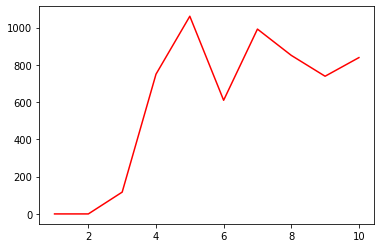

In [175]:
plt.plot(hc['Month'], hc['New Cases'], color='red')
plt.show()

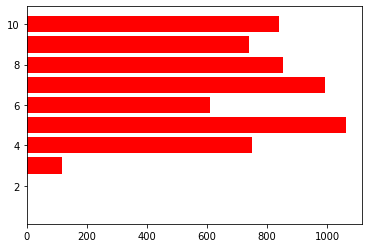

In [176]:
plt.barh(hc['Month'], hc['New Cases'], color='red')
plt.show()

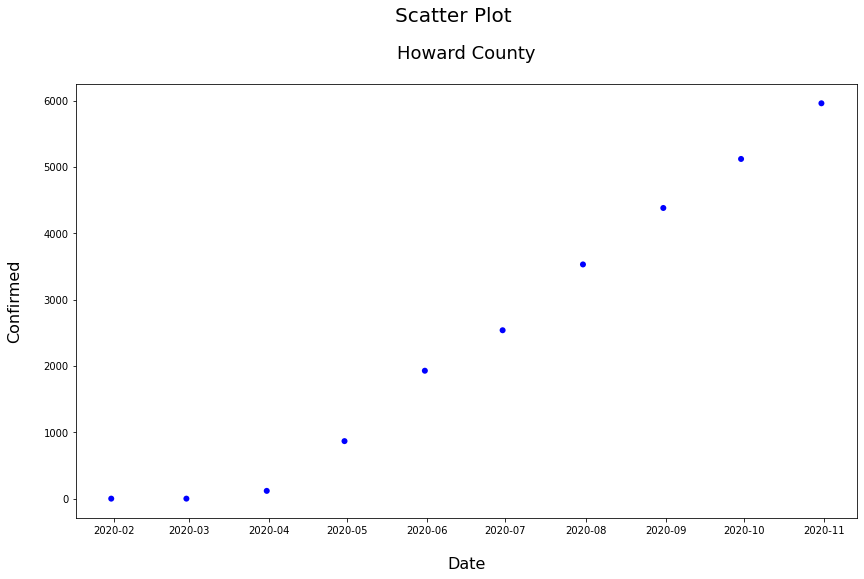

In [177]:
scatter_plot(hc['Date'],hc['Confirmed'],'Date','Confirmed','Scatter Plot','Howard County')

### New Cases Per Month - Top 5 Counties with Most COVID-19 Cases

In [134]:
top5 = covid_by_month_df.groupby(by='County')['Confirmed'].max().to_frame().reset_index().sort_values(by='Confirmed',ascending=False).head(5)
top5 

,County,Confirmed
1758,"Los Angeles, California, US",307618
652,"Cook, Illinois, US",189660
1960,"Miami-Dade, Florida, US",185891
1243,"Harris, Texas, US",161613
1832,"Maricopa, Arizona, US",158761


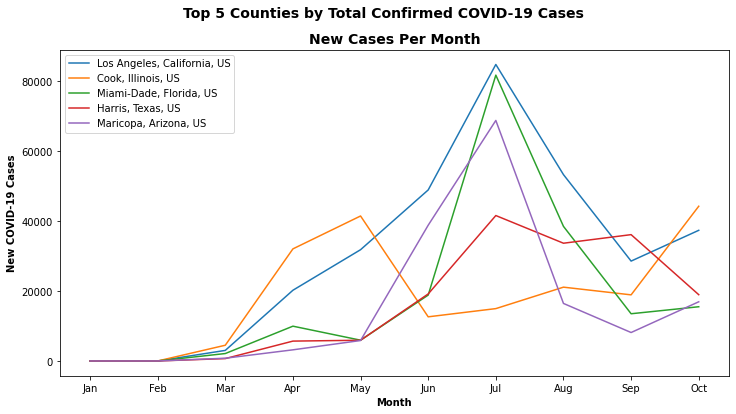

In [136]:
plt.figure(figsize=(12, 6))

# Add a line to a chart representing new cases by month for the county 
for county in top5['County']:

    # Get the list of months with case data for the county
    months = covid_by_month_df[covid_by_month_df['County'] == county]['Month']
    abbrev_months = [datetime.date(2020, month_num, 1).strftime('%b') for month_num in months]

    # Filter covid dataframe to get new cases for the county
    new_cases = covid_by_month_df[covid_by_month_df['County'] == county]['New Cases']

    # Plot the line for the county's new cases each month
    plt.plot(abbrev_months, new_cases, label = county)

# Format the chart
plt.legend(loc='upper left')
plt.title("New Cases Per Month", fontsize=14, fontweight='bold')
plt.suptitle("Top 5 Counties by Total Confirmed COVID-19 Cases", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.ylabel("New COVID-19 Cases", fontweight='bold')

# Show the chart
plt.show()